In [1]:
from __future__ import absolute_import, print_function,division, unicode_literals

import os.path

import glob
import shutil

import tensorflow as tf
assert tf.__version__.startswith('2')

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense,Activation
from keras import regularizers
import keras

import numpy as np
import matplotlib.pyplot as plt
import pathlib
import os

print ('successful')

successful


In [2]:
os.getcwd()

'c:\\Users\\dell\\Downloads\\emtion_pred'

In [3]:
for root, dirs, files in os.walk('C:/Users/dell/Downloads/emtion_pred'):
    print(root, len(files))

C:/Users/dell/Downloads/emtion_pred 1
C:/Users/dell/Downloads/emtion_pred\.ipynb_checkpoints 1
C:/Users/dell/Downloads/emtion_pred\test 0
C:/Users/dell/Downloads/emtion_pred\test\angry 958
C:/Users/dell/Downloads/emtion_pred\test\disgust 111
C:/Users/dell/Downloads/emtion_pred\test\fear 1024
C:/Users/dell/Downloads/emtion_pred\test\happy 1774
C:/Users/dell/Downloads/emtion_pred\test\neutral 1233
C:/Users/dell/Downloads/emtion_pred\test\sad 1247
C:/Users/dell/Downloads/emtion_pred\test\surprise 831
C:/Users/dell/Downloads/emtion_pred\train 0
C:/Users/dell/Downloads/emtion_pred\train\angry 3995
C:/Users/dell/Downloads/emtion_pred\train\disgust 436
C:/Users/dell/Downloads/emtion_pred\train\fear 4097
C:/Users/dell/Downloads/emtion_pred\train\happy 7215
C:/Users/dell/Downloads/emtion_pred\train\neutral 4965
C:/Users/dell/Downloads/emtion_pred\train\sad 4830
C:/Users/dell/Downloads/emtion_pred\train\surprise 3171


In [4]:

#from google.colab import drive
# rive.mount('/content/drive')


In [5]:
#!ls '/content/drive/My Drive/'


In [6]:
import os
print(os.listdir('C:/Users/dell/Downloads/emtion_pred'))

['.ipynb_checkpoints', 'emtions.ipynb', 'test', 'train']


In [7]:
BATCH_SIZE = 8
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [8]:
import zipfile
import os

# Define paths to the zip files
#train_zip_path = r'C:\Users\dell\Downloads\emtion_pred\train.zip'
#test_zip_path = r'C:\Users\dell\Downloads\emtion_pred\test.zip' '''

# Define extraction paths
train_extract_path =  'C:/Users/dell/Downloads/emtion_pred/train'
test_extract_path = r'C:\Users\dell\Downloads\emtion_pred\test'

# Extract train.zip
#with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
   # zip_ref.extractall(train_extract_path)

# Extract test.zip
#with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    #zip_ref.extractall(test_extract_path)


In [9]:
data_dir =r'C:\Users\dell\Downloads\emtion_pred\test'


data_dir = pathlib.Path(data_dir)

CLASS_NAMES = np.array(['surprised','sad','neutral','happy','fearful','disgusted','angry'])

print('Class Names: ', CLASS_NAMES)

Class Names:  ['surprised' 'sad' 'neutral' 'happy' 'fearful' 'disgusted' 'angry']


In [10]:
image_train_gen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.50,
                                     rotation_range=45,
                                     horizontal_flip=True,
                                     width_shift_range=0.15,
                                     height_shift_range=0.15)

train_data_gen = image_train_gen.flow_from_directory(train_extract_path,
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(224,224),
                                                     class_mode='sparse')

img_val_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = img_val_gen.flow_from_directory(test_extract_path,
                                               batch_size=BATCH_SIZE,
                                               target_size=(224,224),
                                               class_mode='sparse')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [11]:
print("Classes detected in training data:")
print(train_data_gen.class_indices)

print("Classes detected in validation data:")
print(val_data_gen.class_indices)


Classes detected in training data:
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Classes detected in validation data:
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [12]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

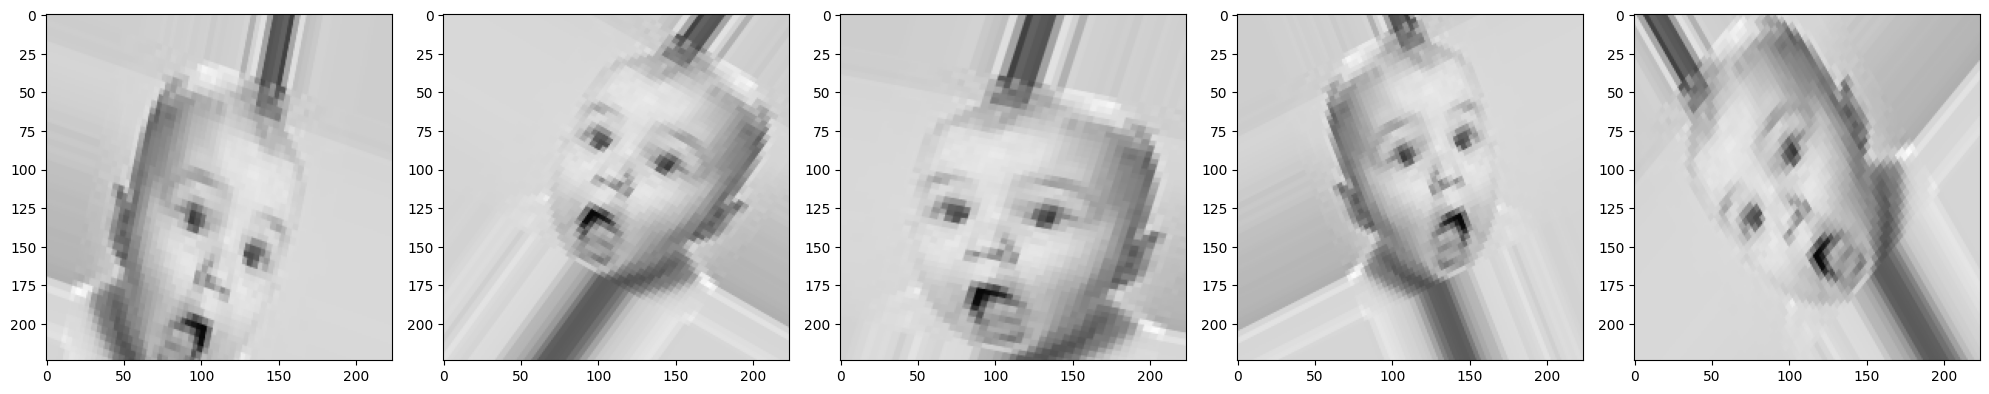

In [13]:
# Plot a few training images
img_array = [train_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

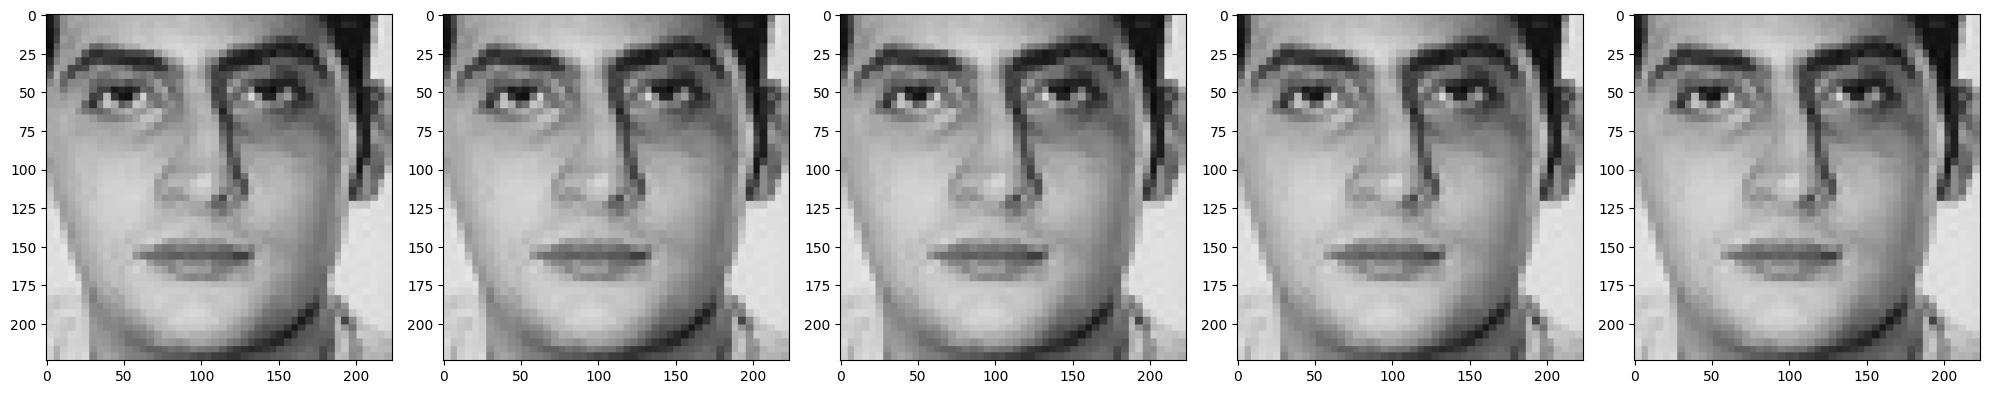

In [14]:
# plot a few val images
img_array  = [val_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

In [16]:
model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(7, activation="softmax"))

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

image_train_gen = ImageDataGenerator(rescale=1./255)

# Exclude unwanted class programmatically
valid_classes = [cls for cls in os.listdir(train_extract_path) if cls != 'train']

train_data_gen = image_train_gen.flow_from_directory(
    train_extract_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    classes=valid_classes
)

# Train the model
history = model.fit(
    train_data_gen,
    epochs=11,
    validation_data=val_data_gen  # Ensure val_data_gen is correctly set
)


Found 28709 images belonging to 7 classes.
Epoch 1/11
898/898 [==============================] - 902s 1s/step - loss: 1.6614 - accuracy: 0.3394 - val_loss: 1.4984 - val_accuracy: 0.4154
Epoch 2/11
898/898 [==============================] - 789s 878ms/step - loss: 1.4315 - accuracy: 0.4475 - val_loss: 1.3526 - val_accuracy: 0.4774
Epoch 3/11
898/898 [==============================] - 784s 873ms/step - loss: 1.2336 - accuracy: 0.5297 - val_loss: 1.3086 - val_accuracy: 0.5022
Epoch 4/11
898/898 [==============================] - 903s 1s/step - loss: 1.0375 - accuracy: 0.6112 - val_loss: 1.3054 - val_accuracy: 0.5143
Epoch 5/11
898/898 [==============================] - 958s 1s/step - loss: 0.8350 - accuracy: 0.6834 - val_loss: 1.4144 - val_accuracy: 0.5194
Epoch 6/11
898/898 [==============================] - 852s 949ms/step - loss: 0.6521 - accuracy: 0.7557 - val_loss: 1.5896 - val_accuracy: 0.5138
Epoch 7/11
898/898 [==============================] - 780s 869ms/step - loss: 0.5100 - acc

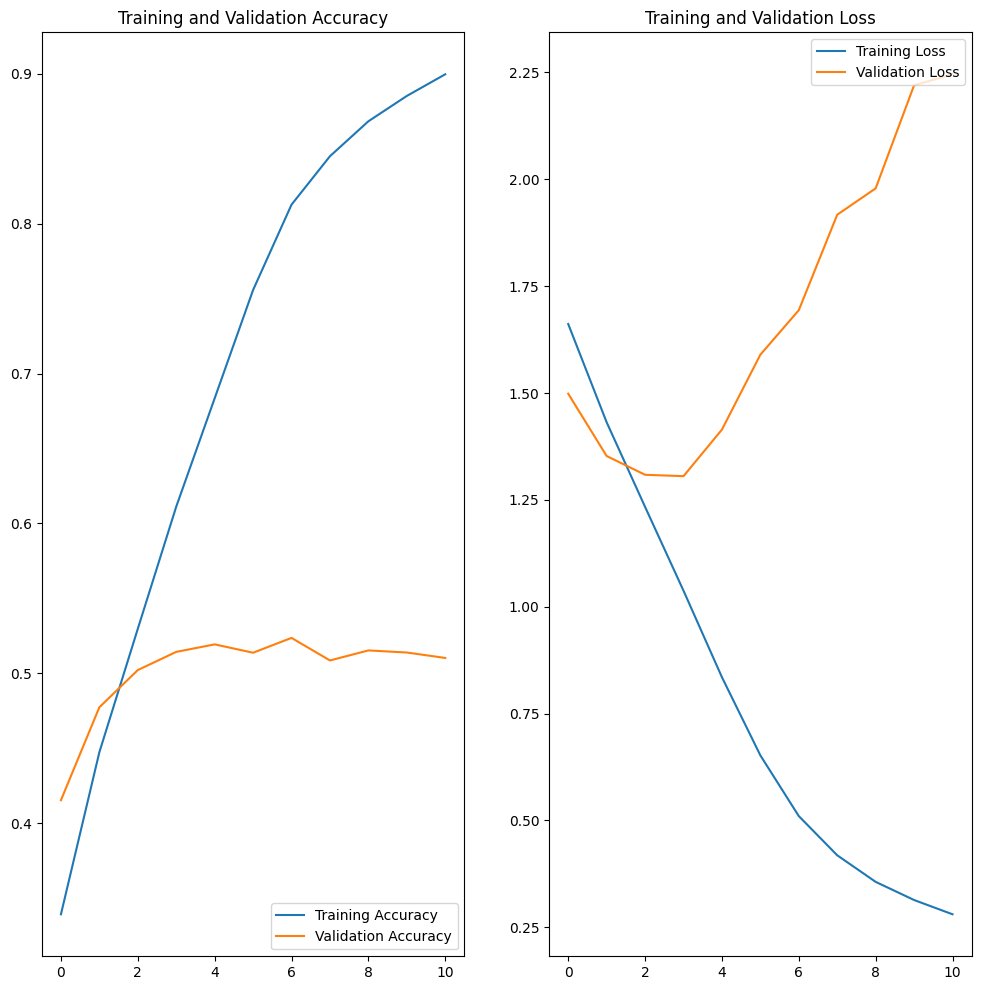

In [17]:
import matplotlib.pyplot as plt

# Extract training metrics
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Set the range for epochs
epochs_range = range(len(acc))  # Use the length of 'acc' to set the range

# Plot the metrics
plt.figure(figsize=(12, 12))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Show the plots
plt.show()


In [18]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def prepare_image(image_path, target_size):
    # Load the image
    img = load_img(image_path, target_size=target_size)
    # Convert to numpy array
    img_array = img_to_array(img)
    # Rescale to 0-1 (same as during training)
    img_array = img_array / 255.0
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [21]:
image_path = r'C:\Users\dell\Downloads\emtion_pred\train\happy\Training_9961393.jpg' # Changed 'emtions_pred' to 'emtion_pred'
target_size = (IMG_HEIGHT, IMG_WIDTH)

# Prepare the image
prepared_image = prepare_image(image_path, target_size)

# Predict the class
predictions = model.predict(prepared_image)

# Get the class with the highest probability
predicted_class = np.argmax(predictions[0])
print(f"Predicted class: {predicted_class}")
for i in range(0,len(CLASS_NAMES)):
    if(i==predicted_class):
        print(CLASS_NAMES[i])


1/1 [==============================] - 0s 196ms/step
Predicted class: 3
happy


In [ ]:
model = load_model(r'/content/drive/My Drive/emtion_pred/emtions.h5')
CLASS_NAMES = np.array(['surprised','sad','neutral','happy','fearful','disgusted','angry'])
IMG_HEIGHT = 224
IMG_WIDTH = 224

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/drive/My Drive/emtion_pred/emtions.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)